This notebook contains the data scraping process of the following websites:
- Brickinsights
- Brickowl
- Brickeconomy

In [2]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
import requests
import time
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

#### BrickInsights 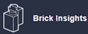

Brickinsights provides the average review score accross a number of different review websites.

In [3]:
# Set Selinium webdriver
driver = webdriver.Chrome(executable_path= 'chromedriver.exe')

In [4]:
lego_sets = pd.read_csv('data/lego_sets_01_03_2021.csv')

In [337]:
# Get review scores from Brickinsights

brick_insights0103 = [] 
for set_num in lego_sets['set_num']:

    try:
        # Track progress
        print(set_num)
        print(len(brick_insights0103))
        
        #web scraping
        url = f'https://brickinsights.com/sets/{set_num}'
        page = driver.get(url)
        
        
        result0 = driver.find_element_by_xpath('/html/body/div[1]/div[2]/div[1]/div[1]/div/p').text.split('\n')
        
        result1 = driver.find_element_by_xpath('/html/body/div[2]/div[1]/div[1]/div/p').text.split('\n')
             
        result2 = driver.find_element_by_xpath('/html/body/div[2]/div[3]/div[2]').text.split('\n')

        result3 = [driver.find_element_by_xpath('/html/body/div[4]/div[1]/div[1]/div[1]/div/p').text.split('\n')[1]]
        
        if (result0 ==[]) & (result1 == []) & (result2 == []) & (result3 == []):
            continue        
             
       # Append results
    
        else:
            
            result = result0 +result1 +result2 + result3
            
            brick_insights0103.append(result)
            
    except:
        pass

001-1
0
0011-2
1
0011-3
2
0012-1
2
0013-1
3
0014-1
4
0015-1
5
0016-1
6
002-1
7
003-1
8
005-1
9
005-2
9
00-6
10
010-1
10
010-3
10
011-1
10
021-1
10
022-1
11
0241187567-1
11
0241199312-1
11
0241357594-1
11
0241401208-1
11
028-1
11
030-2
12
03093-1
12
032-1
12
033-1
12
033-2
13
041-1
13
041-2
14
042-1
14
044-1
14
044-2
14
045-1
14
045-2
15
050-2
15
051-1
15
052-1
15
053-1
15
054-1
15
055-1
15
055-2
15
057-1
15
058-1
15
060-1
15
060-3
15
061-1
15
062-1
15
063-1
15
063-2
15
065-1
15
066-1
16
071-1
17
074-1
17
0744023726-1
17
0744023734-1
17
0744024471-1
17
075-1
17
0751359483-1
17
0756668530-1
17
0756672805-1
17
0756682762-1
17
0756692571-1
17
0756698126-1
17
077-1
17
078-1
17
080-1
18
080-2
19
080-3
20
082-1
20
086-1
20
088-1
20
10000-1
20
1000-1
21
10001-1
22
10002-1
23
10003-1
24
10004-1
25
10005-1
26
10006-1
27
10007-1
28
10008-1
29
10009-1
30
100-1
31
10010-1
32
10011-1
33
10012-1
34
10013-1
35
10014-1
36
10015-1
37
10016-1
38
10017-1
39
10018-1
40
10019-1
41
100-2
42
10020-1
43
10020-

10928-1
577
10929-1
578
10930-1
579
10931-1
579
10932-1
579
10933-1
579
10934-1
579
10937-1
580
1094-1
581
10941-1
582
10943-1
582
1095-1
582
10953-1
583
10955-1
583
10957-1
583
10958-1
583
1096-1
583
1097-1
584
1098-1
585
1099-1
586
1-1
587
1-10
587
1100-1
588
11001-1
589
11002-1
590
11003-1
591
11004-1
592
11005-1
593
11006-1
594
11007-1
595
11008-1
596
11009-1
597
110-1
598
11010-1
598
1101-1
599
11011-1
600
11013-1
601
11016-1
601
1102-1
601
1103-1
602
1103-2
602
1104-1
602
1105-1
602
1106-1
603
1106-2
603
1107-1
603
1108-1
604
1109-1
604
1-11
604
1110-1
604
111-1
605
1111-1
606
111-2
606
1112-1
607
1113-1
607
1114-1
607
1115-1
607
1116-1
607
1118-1
607
111901-1
607
111902-1
607
111903-1
607
111904-1
607
1119-1
607
1-12
607
11-2
607
112005-1
607
112006-1
607
112007-1
608
112008-1
608
1120-1
608
112-1
608
1121-1
609
112-2
610
1122-1
611
112-3
611
1123-1
611
1124-1
612
1125-1
613
1126-1
613
1127-1
613
1128-1
614
1129-1
615
1129-2
616
11-3
616
1130-1
616
113-1
617
1131-1
618
113-2
618

1698-1
964
1699-1
965
1-7
965
170-1
966
1701-1
967
1702-1
967
1703-1
968
1704-1
968
1705-1
969
1708-1
969
17-1
969
1710-1
969
17101-1
970
171-1
971
1711-1
972
1712-1
973
1713-1
974
1714-1
975
1715-1
976
1715-2
977
1716-1
977
1719-1
977
1720-1
977
1721-1
978
1722-1
979
1723-1
980
1724-1
981
1725-1
981
1726-1
981
1727-1
981
1728-1
981
1729-1
982
1730-1
983
1731-1
984
1732-1
985
1733-1
986
1736-1
987
1737-1
988
1739-1
989
1740-1
989
1741-1
990
1742-1
990
1743-1
991
1744-1
992
1745-1
992
1746-1
992
1747-1
993
1749-1
994
1750-1
995
1751-1
996
1752-1
996
1756-1
997
1758-1
998
1759-1
998
1760-1
998
1761-1
999
1762-1
1000
1764-1
1001
1766-1
1001
1767-1
1001
1768-1
1001
1769-1
1001
1772-1
1002
1773-1
1003
1774-1
1004
1775-1
1005
1776-1
1006
1777-1
1007
1778-1
1007
1779-1
1008
1781-1
1008
1782-1
1008
1784-1
1009
1785-1
1009
1786-1
1010
1787-1
1011
1788-1
1012
1789-1
1013
1790-1
1014
1791-1
1015
1792-1
1016
1793-1
1017
1794-1
1018
1795-1
1019
1796-1
1020
1797-1
1021
1798-1
1022
1-8
1022
1800-1
10

2170-1
1389
217-1
1390
2171-1
1391
217-2
1392
2172-1
1393
2173-1
1394
2174-1
1395
2175-1
1396
218-1
1397
2181-1
1398
218158-1
1399
218-2
1399
2182-1
1400
2183-1
1401
2186-1
1402
2187-1
1403
2188-1
1404
2189-1
1405
219-1
1405
2191-1
1405
2192-1
1406
2193-1
1407
2194-1
1408
2198-1
1409
2199-1
1410
220-1
1410
22-1
1411
221-1
1411
221-2
1412
2220-1
1412
222-1
1412
2221-1
1413
222-2
1413
2222-1
1413
2223-1
1414
2224-1
1414
2225-1
1414
2226-1
1414
2229-1
1414
2230-1
1415
223-1
1416
2231-1
1416
223-2
1417
2232-1
1417
2233-1
1418
2234-1
1419
2235-1
1420
2236-1
1421
224-1
1422
2241-1
1422
2242-1
1422
224-3
1422
2245-1
1422
2247-1
1422
2250-1
1423
225-1
1424
2251-1
1424
2252-1
1424
2253-1
1424
2254-1
1424
2255-1
1425
2256-1
1426
2257-1
1427
2258-1
1428
2259-1
1429
2260-1
1430
226-1
1431
2261-1
1432
226-2
1432
2262-1
1433
2263-1
1433
2264-1
1434
2265-1
1434
2266-1
1434
2268-1
1434
2269-1
1434
2270-1
1434
227-1
1434
2271-1
1435
2272-1
1435
2275-1
1435
2276-1
1435
2277-1
1435
2278-1
1435
2279-1
143

2922-1
1627
2925-1
1627
2928-1
1627
2928-2
1628
2930-1
1628
293-1
1628
2931-1
1629
2932-1
1630
2933-1
1631
2935-1
1632
2936-1
1632
2937-1
1633
2938-1
1634
2940-1
1635
294-1
1635
2942-1
1635
2945-1
1636
2946-1
1636
2947-1
1637
2949-1
1638
2950-1
1639
295-1
1639
2951-1
1640
2952-1
1641
2953-1
1642
2954-1
1643
2955-1
1644
2960-1
1645
296-1
1645
2961-1
1646
2962-1
1647
2963-1
1648
2964-1
1649
2965-1
1650
2967-1
1651
2968-1
1651
297-1
1651
2971-1
1651
2975-1
1652
2976-1
1653
2977-1
1654
2979-1
1655
2981-1
1656
2982-1
1657
2983-1
1658
2984-1
1659
2985-1
1660
2987-1
1661
2988-1
1661
2989-1
1661
2990-1
1661
2991-1
1661
2993-1
1661
2995-1
1662
2996-1
1663
2997-1
1664
2998-1
1664
30000-1
1665
3000-1
1666
30001-1
1667
30002-1
1668
30003-1
1669
30004-1
1670
30005-1
1671
30006-1
1672
30008-1
1673
30009-1
1674
300-1
1675
30010-1
1676
3001-1
1677
30011-1
1678
30012-1
1679
30013-1
1680
30014-1
1681
30015-1
1682
30016-1
1683
30017-1
1683
30018-1
1684
30019-1
1685
30020-1
1686
30021-1
1686
30022-1
1687


31048-1
2128
31049-1
2129
310-5
2130
31050-1
2131
3105-1
2132
31051-1
2132
31052-1
2133
31053-1
2134
31054-1
2135
31055-1
2136
31056-1
2137
31057-1
2138
31058-1
2139
31059-1
2140
31060-1
2141
3106-1
2142
31062-1
2142
31063-1
2143
31064-1
2144
31065-1
2145
31066-1
2146
31067-1
2147
31068-1
2148
31069-1
2149
31070-1
2150
3107-1
2151
31071-1
2151
31072-1
2152
31073-1
2153
31074-1
2154
31075-1
2155
31076-1
2156
31077-1
2157
31078-1
2158
31079-1
2159
31080-1
2160
3108-1
2161
31081-1
2162
31083-1
2163
31084-1
2164
31085-1
2165
31086-1
2166
31087-1
2167
31088-1
2168
31089-1
2169
31090-1
2170
31091-1
2171
31092-1
2172
31093-1
2173
31094-1
2174
31095-1
2175
31096-1
2176
31097-1
2177
31098-1
2178
31099-1
2179
31-1
2180
31100-1
2180
3110-1
2181
31101-1
2182
31102-1
2183
31103-1
2184
31104-1
2185
31105-1
2186
31107-1
2187
31108-1
2188
31109-1
2189
311-1
2190
31111-1
2191
31112-1
2191
31113-1
2191
31114-1
2191
31118-1
2191
311-2
2192
3112-1
2193
311-3
2193
311-4
2194
3114-1
2194
311-5
2194
3115-1
2

3731-1
2675
373-2
2676
3732-1
2677
3733-1
2678
3734-1
2679
3735-1
2680
3736-1
2681
3737-1
2682
3738-1
2683
3739-1
2684
3740-1
2685
374-1
2686
3741-1
2687
374-2
2688
3742-1
2689
3743-1
2690
3744-1
2691
3745-1
2692
3746-1
2693
3747-1
2694
3748-1
2695
3750-1
2696
3751-1
2697
375-2
2698
3752-1
2699
375-3
2700
3753-1
2701
3754-1
2702
3755-1
2703
3756-1
2704
3758-1
2705
3759-1
2705
3760-1
2706
376-1
2707
3761-1
2708
376-2
2708
3762-1
2709
3763-1
2709
3770-1
2709
377-1
2710
3771-1
2711
377-2
2712
3772-1
2713
3773-1
2714
3774-1
2715
3775-1
2716
3778-1
2717
378-1
2717
3781-1
2718
3782-1
2718
3784-1
2719
3786-1
2720
3787-1
2721
3788-1
2722
3789-1
2722
379-1
2723
3791-1
2724
379-2
2725
3792-1
2726
3793-1
2726
3794-1
2726
3795-1
2726
3796-1
2727
3797-1
2728
3798-1
2729
3-8
2730
3800-1
2730
380-1
2731
3801-1
2731
3803-1
2732
3804-1
2733
3805-1
2734
3806-1
2735
3807-1
2736
3808-1
2737
3809-1
2738
381-1
2739
381-2
2740
3815-1
2741
3816-1
2742
3817-1
2743
3818-1
2744
382-1
2745
3825-1
2746
3826-1
2747

40361-1
3096
40362-1
3097
40366-1
3098
40367-1
3099
40368-1
3100
40370-1
3101
4037-1
3102
40371-1
3103
40372-1
3104
40373-1
3105
40374-1
3106
40375-1
3107
40376-1
3108
40377-1
3109
40378-1
3110
40379-1
3111
40380-1
3112
4038-1
3113
40381-1
3114
40382-1
3115
40383-1
3116
40384-1
3117
40385-1
3118
40386-1
3119
40388-1
3120
40389-1
3121
4039-1
3121
40391-1
3121
40393-1
3122
40395-1
3123
40396-1
3124
40397-1
3124
40398-1
3124
40399-1
3125
40400-1
3125
4040-1
3125
40401-1
3126
40402-1
3126
40403-1
3126
40404-1
3126
40405-1
3126
40406-1
3126
40407-1
3126
40408-1
3127
40409-1
3128
404-1
3129
40410-1
3130
40411-1
3131
40412-1
3132
40413-1
3133
40414-1
3134
40416-1
3135
40418-1
3136
40419-1
3137
4042-1
3138
40422-1
3139
40423-1
3140
40424-1
3141
40425-1
3142
40426-1
3143
40428-1
3144
40429-1
3145
404-3
3146
4043-1
3146
40431-1
3147
40433-1
3148
40434-1
3149
40435-1
3150
40436-1
3150
40438-1
3151
404-4
3151
40440-1
3151
4044-1
3151
40441-1
3152
40448-1
3152
4045-1
3152
40453-1
3153
40460-1
3153


41592-1
3647
41593-1
3648
41594-1
3649
41595-1
3650
41596-1
3651
41597-1
3652
41598-1
3653
41599-1
3654
41600-1
3655
41601-1
3656
41602-1
3657
41603-1
3658
41604-1
3659
41605-1
3660
41606-1
3661
41607-1
3662
41608-1
3663
41609-1
3664
416-1
3665
41610-1
3665
4161-1
3666
41611-1
3667
41612-1
3668
41613-1
3669
41614-1
3670
41615-1
3671
41616-1
3672
41617-1
3673
41618-1
3674
41619-1
3675
41620-1
3676
4162-1
3677
41621-1
3678
41622-1
3679
41623-1
3680
41624-1
3681
41625-1
3682
41626-1
3683
41627-1
3684
41628-1
3685
41629-1
3686
41630-1
3687
4163-1
3688
41631-1
3689
41632-1
3690
41634-1
3691
41635-1
3692
41636-1
3693
41637-1
3694
4164-1
3695
4165-1
3696
4166-1
3697
41662-1
3698
41663-1
3698
41664-1
3698
41665-1
3698
41666-1
3698
4167-1
3698
4168037-1
3699
4169-1
3700
41691-1
3700
41692-1
3700
4169306a-1
3700
4169306b-1
3700
4169306c-1
3700
4171-1
3700
4172-1
3701
417-3
3702
4173-1
3702
417-4
3703
4174-1
3703
4175-1
3704
4176-1
3705
4177-1
3706
41775-0
3707
41775-1
3708
41775-10
3709
41775-11

4540313-1
4123
4540315-1
4123
454-1
4123
4541-1
4124
454-2
4125
4543-1
4125
4544-1
4126
4546-1
4127
4547-1
4128
4547551-1
4129
4548-1
4130
4548431-1
4131
4549-1
4131
45497-1
4132
45498-1
4132
45499-1
4132
45500-1
4132
45501-1
4133
45502-1
4134
45503-1
4135
45504-1
4136
45505-1
4137
45506-1
4138
45507-1
4139
45508-1
4140
45509-1
4141
455-1
4142
4551-1
4143
45514-1
4144
45517-1
4145
455-2
4146
4552-1
4146
4553-1
4147
4554-1
4148
45544-1
4149
4555-1
4150
45560-1
4151
4556-1
4152
45570-1
4153
4557-1
4153
4558-1
4154
4559-1
4155
4559288-1
4156
4559385-1
4156
4559387-1
4156
4560-1
4156
45601-1
4157
45602-1
4157
45603-1
4157
45604-1
4157
45605-1
4157
45606-1
4157
456-1
4157
45610-1
4158
4561-1
4158
45611-1
4159
456-2
4159
4562-1
4159
4563-1
4160
4564-1
4161
4565-1
4162
4566-1
4163
4567-1
4164
45678-1
4165
45680-1
4166
4568-1
4166
4569-1
4167
4570-1
4168
457-1
4169
4571-1
4169
4572-1
4170
4573-1
4171
4574-1
4172
4575-1
4173
4576-1
4174
4577-1
4175
4578-1
4176
4579-1
4177
45800-1
4178
45801-1
4

5003085-1
4531
5003096-1
4532
5003-1
4532
5003180-1
4532
5003226-1
4532
5003246-1
4532
5003406-1
4532
5003465-1
4532
5003467-1
4532
5003472-1
4532
5003473-1
4532
5003474-1
4532
5003480-1
4532
5003484-1
4532
5003486-1
4532
5003489-1
4532
5003545-1
4532
5003559-1
4532
5003561-1
4532
5003562-1
4532
5003563-1
4532
5003564-1
4533
5003565-1
4533
5003566-1
4533
5003568-1
4533
5003569-1
4533
5003570-1
4533
5003574-1
4533
5003575-1
4533
5003576-1
4533
5003578-1
4533
5003579-1
4533
5003580-1
4533
5003582-1
4533
5003583-1
4533
5003584-1
4533
5003586-1
4533
5004064-1
4533
5004065-1
4533
5004066-1
4533
5004067-1
4533
5004076-1
4533
5004077-1
4534
5004081-1
4535
5004-1
4536
5004102-1
4537
5004103-1
4537
5004115-1
4537
5004116-1
4537
5004117-1
4537
5004118-1
4537
5004119-1
4537
5004120-1
4537
5004127-1
4537
5004128-1
4537
5004129-1
4537
5004130-1
4537
5004131-1
4537
5004192-1
4537
5004195-1
4537
5004196-1
4537
5004197-1
4537
5004237-1
4537
5004238-1
4538
5004248-1
4539
5004249-1
4539
5004250-1
4539
5

5032-1
4701
5033-1
4701
5034-1
4702
5035-1
4703
5036-1
4704
5037-1
4704
5038-1
4705
5039-1
4705
5040-1
4705
504-1
4705
5041-1
4705
5042-1
4705
5043-1
4706
5044-1
4707
5045-1
4708
5046-1
4708
5047-1
4709
5048-1
4709
5049-1
4710
5050-1
4711
5051-1
4712
5052-1
4713
5053-1
4714
5054-1
4715
5055-1
4716
5056-1
4717
5057-1
4718
5057-2
4719
5058-1
4719
5059-1
4720
5060-1
4721
5061-1
4722
5062-1
4723
5063-1
4724
5064-1
4724
5065-1
4724
5066-1
4725
5067-1
4726
5068-1
4727
5069-1
4728
5070-1
4729
507-1
4730
5071-1
4731
5072-1
4732
5073-1
4733
5074-1
4734
5075-1
4735
5076-1
4736
5077-1
4736
5078-1
4737
5079-1
4738
50799-1
4739
5080-1
4739
508-1
4739
5081-1
4739
5082-1
4740
5083-1
4741
5084-1
4741
5085-1
4741
5086-1
4742
5087-1
4742
5088-1
4742
5089-1
4742
5090-1
4743
509-1
4743
5091-1
4743
5098-1
4743
5099-1
4743
50999-1
4744
5100-1
4744
510-1
4745
5101-1
4746
510-2
4747
5102-1
4747
510-3
4747
5103-1
4747
5104-1
4748
5105-1
4749
5106-1
4749
5107-1
4749
5108-1
4750
5109-1
4751
5110-1
4752
5110-2
47

5632-1
5054
5633-1
5055
5634-1
5056
5635-1
5056
5636-1
5057
5637-1
5058
5638-1
5059
5639-1
5060
5640-1
5060
5641-1
5061
5642-1
5061
5643-1
5062
5644-1
5063
5645-1
5064
5646-1
5065
5647-1
5066
5648-1
5067
5649-1
5068
5650-1
5068
565-1
5068
5651-1
5069
565-2
5070
5652-1
5071
5653-1
5071
5654-1
5072
5655-1
5073
5656-1
5074
5657-1
5075
5658-1
5076
5659-1
5077
566-1
5078
5678-1
5079
5679-1
5079
5680-1
5080
5681-1
5081
5682-1
5082
5683-1
5083
5684-1
5084
5685-1
5084
5691-1
5085
5695-1
5085
5696-1
5085
5700-1
5085
570-1
5086
5701-1
5087
5706-1
5088
5714-1
5089
5748-1
5090
5749-1
5090
575-1
5090
575-2
5091
5761-1
5091
5762-1
5092
5763-1
5093
5764-1
5094
5765-1
5095
5766-1
5096
5767-1
5097
5770-1
5098
577-1
5099
5771-1
5100
5785-1
5101
5793-1
5102
5794-1
5102
5795-1
5102
580-1
5102
5801-1
5103
5802-1
5104
5803-1
5105
5804-1
5106
5805-1
5107
5807-1
5108
5808-1
5109
5810-1
5110
5811-1
5111
5812-1
5112
5813-1
5113
5814-1
5114
5815-1
5115
5816-1
5116
5817-1
5117
5818-1
5117
5819-1
5117
5820-1
5117


6132-1
5657
6133-1
5658
6134-1
5658
6135-1
5658
6136-1
5659
6136-2
5660
6137-1
5660
6138-1
5661
6140-1
5662
614-1
5663
6141-1
5664
6142657-1
5664
6142702-1
5664
6143-1
5664
6144-1
5665
6145-1
5665
6146-1
5666
6150-1
5666
6151-1
5667
615-2
5668
6152-1
5669
6153-1
5670
6154-1
5671
6155-1
5672
6156-1
5673
6157-1
5674
6158-1
5675
6159-1
5675
6160-1
5676
616-1
5677
6161-1
5678
6162-1
5679
6162839-1
5680
6163-1
5680
6164-1
5681
6166-1
5682
6167-1
5683
6168-1
5684
6168272-1
5685
6169-1
5685
617-1
5686
6171-1
5687
6171875-1
5687
6172-1
5687
6173-1
5688
6175-1
5689
6176-1
5690
6176782-1
5691
6177-1
5691
6178-1
5692
6180-1
5692
618-1
5693
6186-1
5694
6187-1
5695
6190-1
5696
619-1
5697
6191-1
5698
6192-1
5699
6193-1
5700
6194-1
5701
6195-1
5702
6198-1
5703
6199-1
5704
6200-1
5705
6200-2
5705
620-1
5706
6201-1
5707
620-2
5708
6202-1
5709
620-3
5710
6203-1
5711
6204-1
5712
6205-1
5713
6206-1
5714
6207-1
5715
6208-1
5716
6209-1
5717
6210-1
5718
621-1
5719
6211-1
5720
6211760-1
5721
621-2
5721
6212-1

66231-1
6165
66236-1
6165
66237-1
6165
66239-1
6166
6624-1
6166
66246-1
6167
66247-1
6168
6625-1
6168
66254-1
6169
66255-1
6169
66256-1
6170
66257-1
6170
66258-1
6170
66260-1
6170
6626-1
6170
6626-2
6171
66262-1
6172
66264-1
6172
6627-1
6172
6628-1
6173
6628-2
6174
66282-1
6175
66283-1
6175
66284-1
6175
66290-1
6175
6629-1
6175
6630-1
6176
66305-1
6177
66306-1
6177
66307-1
6177
66308-1
6177
663-1
6177
66310-1
6178
6631-1
6178
66311-1
6179
66318-1
6179
66319-1
6180
66320-1
6180
6632-1
6180
66321-1
6181
66325-1
6181
66326-1
6181
66328-1
6181
66329-1
6181
66330-1
6181
6633-1
6181
66331-1
6182
66332-1
6182
6634-1
6182
66341-1
6183
66342-1
6183
66344-1
6183
66345-1
6183
66357-1
6184
66358-1
6184
66359-1
6184
66360-1
6184
6636-1
6184
66361-1
6185
66362-1
6185
66363-1
6185
66364-1
6185
66365-1
6185
66366-1
6185
66367-1
6186
66368-1
6186
6637-1
6186
66373-1
6186
66374-1
6186
66375-1
6186
66377-1
6186
66378-1
6186
66379-1
6187
66380-1
6187
6638-1
6187
66383-1
6188
66386-1
6188
66387-1
6188
6638

70205-1
6618
70206-1
6619
70207-1
6619
70208-1
6620
70209-1
6621
702-1
6622
70210-1
6623
7021-1
6624
70211-1
6625
70212-1
6626
70220-1
6627
70221-1
6628
70222-1
6629
70223-1
6630
70224-1
6631
70225-1
6632
70226-1
6633
70227-1
6634
70228-1
6635
70229-1
6636
702-3
6637
70230-1
6637
70231-1
6638
70232-1
6639
7029-1
6640
7030-1
6641
703-1
6642
70310-1
6643
7031-1
6644
70311-1
6645
70312-1
6646
70313-1
6647
70314-1
6648
70315-1
6649
70316-1
6650
70317-1
6651
70318-1
6652
70319-1
6653
70320-1
6654
7032-1
6655
70321-1
6656
70322-1
6657
70323-1
6658
70324-1
6659
70325-1
6660
70326-1
6661
70327-1
6662
703-3
6663
70330-1
6663
7033-1
6664
70331-1
6665
70332-1
6666
70333-1
6667
70334-1
6668
70335-1
6669
70336-1
6670
70337-1
6671
70338-1
6672
70339-1
6673
7034-1
6674
70347-1
6675
70348-1
6676
70349-1
6677
70350-1
6678
7035-1
6679
70351-1
6680
70352-1
6681
70353-1
6682
70354-1
6683
70355-1
6684
70356-1
6685
70357-1
6686
70358-1
6687
70359-1
6688
7036-1
6689
70361-1
6690
70362-1
6691
70363-1
6692
703

71013-5
7219
71013-6
7220
71013-7
7221
71013-8
7222
71013-9
7223
71014-0
7224
71014-1
7224
71014-10
7225
71014-11
7226
71014-12
7227
71014-13
7228
71014-14
7229
71014-15
7230
71014-16
7231
71014-17
7232
71014-18
7233
71014-2
7233
71014-3
7234
71014-4
7235
71014-5
7236
71014-6
7237
71014-7
7238
71014-8
7239
71014-9
7240
71016-1
7241
71017-0
7242
71017-1
7243
71017-10
7244
71017-11
7245
71017-12
7246
71017-13
7247
71017-14
7248
71017-15
7249
71017-16
7250
71017-17
7251
71017-18
7252
71017-19
7253
71017-2
7254
71017-20
7255
71017-21
7256
71017-3
7257
71017-4
7258
71017-5
7259
71017-6
7260
71017-7
7261
71017-8
7262
71017-9
7263
71018-0
7264
71018-1
7265
71018-10
7266
71018-11
7267
71018-12
7268
71018-13
7269
71018-14
7270
71018-15
7271
71018-16
7272
71018-17
7273
71018-18
7274
71018-2
7274
71018-3
7275
71018-4
7276
71018-5
7277
71018-6
7278
71018-7
7279
71018-8
7280
71018-9
7281
71019-0
7282
71019-1
7282
71019-10
7283
71019-11
7284
71019-12
7285
71019-13
7286
71019-14
7287
71019-15
7288
71

7270-1
7816
727-1
7817
7271-1
7818
7272-1
7819
7274-1
7820
7275-1
7821
7276-1
7822
7278-1
7823
7279-1
7824
7280-1
7825
7281-1
7826
7283-1
7827
7285-1
7828
7286-1
7829
7287-1
7830
7288-1
7831
7290-1
7832
7291-1
7833
7292-1
7834
7294-1
7835
7295-1
7836
7296-1
7837
7297-1
7838
7298-1
7839
7-3
7840
7300-1
7841
730-1
7842
7301-1
7843
730-2
7844
7302-1
7845
7303-1
7846
7305-1
7847
7306-1
7848
7307-1
7849
7308-1
7850
7309-1
7851
7310-1
7852
7311-1
7853
7312-1
7854
73129-1
7855
7313-1
7855
7314-1
7856
7315-1
7857
7316-1
7858
7317-1
7859
7320-1
7860
7321-1
7861
7322-1
7862
7323-1
7863
7324-1
7864
7325-1
7865
7326-1
7866
7327-1
7867
7330-1
7868
733-1
7868
7331-1
7869
7332-1
7869
7333-1
7870
7335-1
7871
7336-1
7871
7337-1
7871
7338-1
7871
7339-1
7871
7344-1
7871
7345-1
7872
7346-1
7873
7347-1
7874
7348-1
7875
7349-1
7875
7349-2
7875
7349-3
7875
735-1
7875
7383-1
7876
7396-1
7877
7398-1
7877
7400-1
7878
740-1
7878
740-2
7879
7409-1
7880
7410-1
7881
741-1
7882
7411-1
7883
7412-1
7884
7413-1
7885
74

76014-1
8406
76015-1
8407
76016-1
8408
76017-1
8409
76018-1
8410
76019-1
8411
760-2
8412
76020-1
8413
7602-1
8414
76021-1
8415
76022-1
8416
76023-1
8417
76025-1
8418
76026-1
8419
76027-1
8420
76028-1
8421
76029-1
8422
76030-1
8423
7603-1
8424
76031-1
8424
76032-1
8425
76034-1
8426
76035-1
8427
76036-1
8428
76037-1
8429
76038-1
8430
76039-1
8431
76040-1
8432
7604-1
8433
76041-1
8434
76042-1
8435
76044-1
8436
76045-1
8437
76046-1
8438
76047-1
8439
76048-1
8440
76049-1
8441
76050-1
8442
7605-1
8443
76051-1
8444
76052-1
8445
76053-1
8446
76054-1
8447
76055-1
8448
76056-1
8449
76057-1
8450
76058-1
8451
76059-1
8452
76060-1
8453
7606-1
8454
76061-1
8455
76062-1
8456
76063-1
8457
76064-1
8458
76065-1
8459
76066-1
8460
76067-1
8461
76068-1
8462
76069-1
8463
76070-1
8464
7607-1
8465
76071-1
8465
76072-1
8466
76073-1
8467
76075-1
8468
76076-1
8469
76077-1
8470
76078-1
8471
76079-1
8472
76080-1
8473
7608-1
8474
76081-1
8474
76082-1
8475
76083-1
8476
76084-1
8477
76085-1
8478
76086-1
8479
76087-1


805-1
8999
8051-1
9000
805-2
9001
8052-1
9001
8053-1
9002
8054-1
9003
8055-1
9004
8056-1
9005
8057-1
9006
8058-1
9007
8059-1
9008
8060-1
9009
806-1
9010
8061-1
9010
806-2
9011
8062-1
9011
8063-1
9012
8064-1
9013
8065-1
9014
8066-1
9015
8067-1
9016
8068-1
9017
8069-1
9018
8070-1
9019
807-1
9020
8071-1
9020
8072-1
9021
8073-1
9022
8074-1
9023
80741919-1
9024
8075-1
9024
8076-1
9025
8077-1
9026
8078-1
9027
8079-1
9028
80791214-1
9029
80791412-1
9029
8080-1
9029
808-1
9030
8081-1
9031
8082-1
9032
8083-1
9033
8084-1
9034
8085-1
9035
8086-1
9036
8087-1
9037
8088-1
9038
8089-1
9039
8090-1
9040
809-1
9041
8091-1
9042
8092-1
9043
8093-1
9044
8094-1
9045
8095-1
9046
8096-1
9047
8097-1
9048
8098-1
9049
8099-1
9050
81000-1
9051
810002-1
9052
810003-1
9052
810005-1
9052
8100-1
9052
81001-1
9053
81002-1
9054
81003-1
9055
81007-1
9056
810-1
9056
8101-1
9057
810-2
9058
8102-1
9059
810-3
9060
8103-1
9061
810-4
9062
8104-1
9063
8105-1
9064
8106-1
9065
8107-1
9066
8108-1
9067
8109-1
9068
8110-1
9069
811-

8522-1
9506
852216-1
9507
852217-1
9507
852227-1
9508
852231-1
9509
852242-1
9509
852245-1
9509
852247-1
9509
852266-1
9509
852271-1
9509
852272-1
9510
852273-1
9511
852293-1
9512
852294-1
9513
8523-1
9513
852331-1
9514
852333-1
9515
852341-1
9515
852347-1
9516
852351-1
9516
852354-1
9517
852445-1
9518
852500-1
9519
852504-1
9519
8525-1
9520
852513-1
9521
852535-1
9521
852543-1
9522
852547-1
9523
852548-1
9524
852549-1
9525
852550-1
9526
852551-1
9527
852552-1
9528
852553-1
9529
852554-1
9530
852555-1
9531
852666-1
9532
852678-1
9532
852690-1
9532
852697-1
9533
852701-1
9534
852702-1
9535
852708-1
9536
8527-1
9536
852713-1
9537
852715-1
9537
852717-1
9538
852719-1
9538
852734-1
9539
852737-1
9539
852741-1
9540
852742-1
9541
852744-1
9542
852747-1
9542
852748-1
9543
852750-1
9544
852751-1
9545
852753-1
9546
852766-1
9547
852766-2
9547
852766-3
9547
852768-1
9547
852769-1
9548
852771-1
9549
852774-1
9550
852777-1
9551
852778-1
9552
852780-1
9552
852781-1
9552
852786-1
9552
8528-1
9553
85

8609-1
9844
8610-1
9845
8611-1
9846
8612-1
9847
8613-1
9848
8614-1
9849
8614-2
9850
8615-1
9850
8615-2
9851
8616-1
9851
8616-2
9852
8617-1
9852
8617-2
9853
8618-1
9853
8618-2
9854
8619-1
9854
8619-2
9855
8620-1
9855
862011-1
9856
8621-1
9856
8622-1
9857
8623-1
9858
8624-1
9859
8625-1
9860
8626-1
9861
8630-1
9862
8631-1
9863
8632-1
9864
8633-1
9865
8634-1
9866
8635-1
9867
8636-1
9868
8637-1
9869
8638-1
9870
8639-1
9871
8640-1
9872
8641-1
9873
8642-1
9874
8643-1
9875
8644-1
9876
8645-1
9877
8646-1
9878
8647-1
9879
8648-1
9880
8649-1
9881
8650-1
9882
8651-1
9883
8652-1
9884
8653-1
9885
8654-1
9886
8655-1
9887
8656-1
9888
8657-1
9889
8658-1
9890
8660-1
9891
8661-1
9892
8662-1
9893
8663-1
9894
8664-1
9895
8665-1
9896
8666-1
9897
8667-1
9898
8668-1
9899
8669-1
9900
8670-1
9901
8671-1
9902
8672-1
9903
8673-1
9904
8674-1
9905
8675-1
9906
8676-1
9907
8677-1
9908
8678-1
9909
8679-1
9910
8680-1
9911
8681-1
9912
8682-1
9913
8683-0
9914
8683-1
9915
8683-10
9916
8683-11
9917
8683-12
9918
8683-13
991

8984-1
10369
8985-1
10370
8986-1
10371
8987-1
10372
8988-1
10373
8989-1
10374
8990-1
10375
8991-1
10376
8992-1
10377
8993-1
10378
8994-1
10379
8995-1
10380
8996-1
10381
8998-1
10382
900-1
10383
9001116-1
10384
9001192-1
10384
9001-2
10384
9001857-1
10384
900-2
10384
9002052-1
10384
9002076-1
10384
9002090-1
10384
9002-1
10384
9002687-1
10384
9002700-1
10384
9002908-1
10384
9002922-1
10384
9002953-1
10384
9003363-1
10384
9004-1
10384
9004216-1
10384
9004889-1
10384
9005008-1
10384
9005039-1
10384
9006-1
10384
9008-1
10384
901-1
10384
901-2
10385
90-2
10385
9020-1
10385
902-1
10386
9021-1
10386
9022-1
10386
9023-1
10386
9027-1
10387
9030-1
10387
903-1
10387
904940-1
10387
9050-1
10387
905-1
10387
9051-1
10387
9055-1
10387
9057-1
10387
9058-1
10387
9059-1
10388
9060-1
10388
906-1
10388
9063-1
10388
9064-1
10388
9065-1
10388
9065-2
10388
9066-1
10388
9067-1
10388
9070-1
10388
9071-1
10388
9075-1
10388
9076-1
10388
9077-1
10389
9078-1
10389
9079-1
10389
9080-1
10389
9081-1
10389
9085-1
1038

970118-1
10624
970119-1
10624
970120-1
10624
970121-1
10624
970122-1
10624
970-2
10624
9702-1
10624
970600-1
10625
970601-1
10625
970602-1
10625
970603-1
10625
970604-1
10625
970605-1
10625
970606-1
10625
970607-1
10625
970608-1
10625
970609-1
10625
970610-1
10625
970611-1
10625
970612-1
10625
970613-1
10625
970614-1
10625
970615-1
10625
970616-1
10625
970617-1
10625
970618-1
10625
970619-1
10625
970620-1
10625
970621-1
10625
970622-1
10625
970623-1
10625
970624-1
10625
970625-1
10625
970626-1
10625
970627-1
10625
970628-1
10625
970629-1
10625
970630-1
10625
970631-1
10625
970632-1
10625
970633-1
10625
970634-1
10625
970635-1
10625
970636-1
10625
970637-1
10625
970638-1
10625
970639-1
10625
970640-1
10625
970641-1
10625
970643-1
10625
970645-1
10625
970646-1
10625
970653-1
10625
970654-1
10625
970658-1
10625
970659-1
10625
970660-1
10625
970661-1
10625
970662-1
10625
970663-1
10625
970665-1
10625
970669-1
10625
970670-1
10625
970671-1
10625
970672-1
10625
970673-1
10625
970674-1
10625


BEIJINGSTANDEE-1
10664
Berlin-1
10664
BIGBOX-1
10664
bilmasks-1
10664
Birmingham-1
10664
BIRTHDAYCAKE-1
10664
BLUE-1
10664
BOOKANDPENCIL-1
10665
BORDEAUX-1
10665
Braintree-1
10665
BULL-1
10665
C8500-1
10665
C8504-1
10665
C8509-1
10665
C8509-2
10665
C8509-3
10665
C8509-4
10665
C8509-5
10665
C8511-1
10665
C8511-2
10665
C8512-1
10665
C8521-1
10665
Calgary-1
10665
CANDYBOX-1
10665
CAPTAINMARVEL-1
10665
CARROT-1
10665
casbon-1
10665
CASTLEBYERS-1
10665
CCegg-1
10665
CELEB2015-1
10665
CELEBV-1
10665
celebvi-1
10666
Chandler-1
10666
CHICK-1
10666
CINCINNATI-1
10666
CINDERELLASCASTLE-1
10666
CLUBHOUSE-1
10666
cnminifigs-1
10666
cokejpiii-1
10666
cokesoccer-1
10666
Columbus-1
10666
comcon001-1
10666
comcon002-1
10666
comcon003-1
10666
comcon004-1
10666
comcon005-1
10666
comcon006-1
10666
comcon007-1
10666
comcon008-1
10666
comcon009-1
10666
comcon010-1
10666
comcon011-1
10666
COMCON013-1
10666
comcon014-1
10666
COMCON015-1
10666
COMCON016-1
10666
comcon017-1
10666
comcon018-1
10666
comcon019-1


MMMB007-1
10685
MMMB008-1
10685
MMMB009-1
10685
MMMB010-1
10685
MMMB012-1
10686
MMMB013-1
10686
MMMB015-1
10686
MMMB016-1
10686
MMMB017-1
10686
MMMB022-1
10686
MMMB023-1
10686
MMMB024-1
10686
MMMB025-1
10686
MMMB026-1
10686
MMMB027-1
10686
MMMB028-1
10686
MMMB029-1
10686
MMMB030-1
10686
MMMB031-1
10686
MMMB032-1
10686
MMMB033-1
10686
MMMB034-1
10686
MMMB035-1
10686
MMMB036-1
10686
MMMB037-1
10686
MMMB038-1
10686
MMMB039-1
10686
MMMB040-1
10687
MMMB041-1
10688
MMMB042-1
10688
MMMB043-1
10688
MMMB044-1
10688
MMMB045-1
10688
MOMENTS-1
10688
MONKIEKIDHEAD-1
10688
MS1032-1
10688
MS1034-1
10688
MS1038-1
10688
MS1040-1
10688
MS1042-1
10688
MS1044-1
10688
MS1046-1
10689
MS1048-1
10690
MS1049-1
10690
MS1060-1
10690
MUNICH-1
10690
MYERNEXO-1
10690
MYERNEXO-2
10690
MYSTERYBOX-1
10690
MYSTERYBOX-2
10690
MYSTERYBOX-3
10690
MYSTERYMACHINE-1
10690
NAA1030-1
10690
Nashville-1
10690
NEO1048-1
10690
Newark-1
10690
NEWSSTAND-1
10690
NINJAGOSPINNER-1
10691
NINJATRU-1
10691
NINJATRU-2
10691
NINJATRU-3
1069

In [338]:
pd.DataFrame(brick_insights0103).to_csv('data/brick_insights_reviewscore0103.csv',index= False)

In [304]:
pd.DataFrame(brick_insights)

,0,1,2,3
0,0011-2,Unknown,We do not currently know how the average price...,100
1,0011-3,Unknown,Average PPP for System in 1987 is 0.3. PPP for...,
2,0012-1,Unknown,We do not currently know how the average price...,50
3,0013-1,Unknown,We do not currently know how the average price...,100
4,0014-1,59,We do not currently know how the average price...,50
5,0015-1,Unknown,We do not currently know how the average price...,100
6,0016-1,Unknown,We do not currently know how the average price...,50
7,002-1,Unknown,We do not currently know how the average price...,100
8,003-1,Unknown,Average PPP for System in 1966 is 0.55. PPP fo...,100


#### Brick Owl

Brickowl is the other major secondary Lego market (alongside Bricklink).

In [5]:
# Lego sets are named differently in the search of BrickOwl
lego_sets['brick_owl_set'] = lego_sets['set_num'].str.split('-').str[0]

In [6]:
lego_sets['brick_owl_name'] = lego_sets['name'].apply(lambda x: x.lower()).str.replace(' ', '-')

In [7]:
lego_sets

,set_num,name,year,theme_id,num_parts,brick_owl_set,brick_owl_name
0,001-1,Gears,1965,1,43,001,gears
1,0011-2,Town Mini-Figures,1978,84,12,0011,town-mini-figures
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,0011,castle-2-for-1-bonus-offer
3,0012-1,Space Mini-Figures,1979,143,12,0012,space-mini-figures
4,0013-1,Space Mini-Figures,1979,143,12,0013,space-mini-figures
...,...,...,...,...,...,...,...
16190,XMASTREE-1,Christmas Tree,2019,410,26,XMASTREE,christmas-tree
16191,XWING-1,Mini X-Wing Fighter,2019,158,60,XWING,mini-x-wing-fighter
16192,XWING-2,X-Wing Trench Run,2019,158,52,XWING,x-wing-trench-run
16193,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,YODACHRON,yoda-chronicles-promotional-set


In [8]:
# Brickowl will automatically time out after some time of scraping. Scraping had to be broken into separate sessions, e.g.
brick_owl_price4 = [] 
for i in range(8000,11000):

    try:
        # Track progress
        print(i, end ='\r')
        #print(len(brick_owl_price), end = '\r')
        
        #web scraping
        url = f'https://www.brickowl.com/catalog/lego-{lego_sets.iloc[i,6]}-set-{lego_sets.iloc[i,5]}'
        page = driver.get(url)
        
        
        result0 = driver.find_element_by_xpath('//*[@id="right-wide"]/table/tbody/tr[1]/td[2]/span').text.split('\n')
        
        result1 = [driver.find_element_by_xpath('//*[@id="right-wide"]/table/tbody').text.split('\n')[-1].split('$')[1]]

        
        if (result0 ==[]) & (result1 == []):
            continue        
             
       # Append results
    
        else:
            
            result = result0 +result1
            
            brick_owl_price4.append(result)
            
    except:
        pass

In [18]:
brick_owl_price1 = pd.DataFrame(brick_owl_price1, columns = ['set_num', 'value'])

In [20]:
brick_owl_price1.to_csv('brick_owl_price1.csv', index = False)

In [23]:
brick_owl_price2 = pd.DataFrame(brick_owl_price2, columns = ['set_num', 'value'])
brick_owl_price2.to_csv('brick_owl_price2.csv', index = False)

In [20]:
brick_owl_price3 = pd.DataFrame(brick_owl_price3, columns = ['set_num', 'value'])
brick_owl_price3.to_csv('brick_owl_price3.csv', index = False)

In [11]:
brick_owl_price4 = pd.DataFrame(brick_owl_price4, columns = ['set_num', 'value'])
brick_owl_price4.to_csv('brick_owl_price4.csv', index = False)

In [16]:
brick_owl_price5 = pd.read_csv('brick_owl_price5.csv')
brick_owl_price6 = pd.read_csv('brick_owl_price6.csv')

In [14]:
brick_owl_price1 = pd.read_csv('brick_owl_price1.csv')
brick_owl_price2 = pd.read_csv('brick_owl_price2.csv')
brick_owl_price3 = pd.read_csv('brick_owl_price3.csv')

In [21]:
brick_owl = pd.concat([brick_owl_price1, brick_owl_price2, brick_owl_price3, brick_owl_price4, brick_owl_price5, brick_owl_price6],
                     axis = 0)
brick_owl.shape

(5158, 2)

In [31]:
brick_owl['value'] = brick_owl['value'].str.replace(',', '').astype(float)

In [34]:
brick_owl.dtypes

set_num     object
value      float64
dtype: object

In [35]:
brick_owl.to_csv('data/brick_owl.csv', index = False)

 #### BrickEconomy 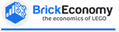

BrickEconomy gets pricing information from a wide range of web sources (including even Ebay) and has its own algorithm to calculate the value growth for each lego set.

In [183]:
# check data structure
r = f'https://www.brickeconomy.com/search?query=21311'
pa = driver.get(r)
l = driver.find_element_by_xpath('//*[@id="ContentPlaceHolder1_ctlSetsOverview_GridViewSets"]/tbody/tr[2]/td[3]').text.split('\n')

In [215]:
{i.rsplit(' ',1)[0]:i.rsplit(' ',1)[1] for i in m}

{'set_num': '21311',
 'Retail': 'C$242.99',
 'Value': 'C$350.95',
 'Growth': '44.4%',
 'Annual growth': '27.4%'}

In [214]:
m = ['set_num 21311'] + l

In [216]:
n = {i.rsplit(' ',1)[0]:i.rsplit(' ',1)[1] for i in m}

In [221]:
pd.DataFrame(n.values(), index = n.keys()).transpose()

,set_num,Retail,Value,Growth,Annual growth
0,21311,C$242.99,C$350.95,44.4%,27.4%


In [299]:
#loop through all lego sets
%%time

brick_econ_overview = pd.DataFrame(columns= [], index=['set_num']).transpose()
for set_num in lego_sets['set_num']:

    try:
        # Track progress
        print(set_num)
        print(len(brick_econ_overview))
        
        #web scraping
        url = f'https://www.brickeconomy.com/search?query={set_num}'
        page = driver.get(url)
        
        
        element = driver.find_element_by_xpath('//*[@id="ContentPlaceHolder1_ctlSetsOverview_GridViewSets"]/tbody/tr[2]/td[3]').text.split('\n')
        
        add_set_num = [f'set_num {set_num}'] + element
        
        result = {}
        
        for i in add_set_num:
            if len(i.rsplit(' ',1)) == 2:
                result = {**result, **{i.rsplit(' ',1)[0]:i.rsplit(' ',1)[1]}}
                                        
        #result = {i.rsplit(' ',1)[0]:i.rsplit(' ',1)[1] for i in add_set_num}
        
        df = pd.DataFrame(result.values(), index = result.keys()).transpose()
        
        brick_econ_overview = pd.merge(brick_econ_overview, df, how = 'outer')  
           
    except:
        pass


001-1
0
0011-2
1
0011-3
2
0012-1
3
0013-1
4
0014-1
5
0015-1
6
0016-1
7
002-1
8
003-1
9
005-1
10
005-2
11
00-6
12
010-1
12
010-3
13
011-1
14
021-1
15
022-1
16
0241187567-1
17
0241199312-1
18
0241357594-1
18
0241401208-1
19
028-1
20
030-2
21
03093-1
22
032-1
22
033-1
23
033-2
24
041-1
25
041-2
26
042-1
27
044-1
28
044-2
29
045-1
30
045-2
31
050-2
32
051-1
33
052-1
34
053-1
35
054-1
36
055-1
37
055-2
38
057-1
39
058-1
40
060-1
41
060-3
42
061-1
43
062-1
44
063-1
45
063-2
46
065-1
47
066-1
48
071-1
49
074-1
50
0744023726-1
51
0744023734-1
51
0744024471-1
51
075-1
52
0751359483-1
53
0756668530-1
53
0756672805-1
54
0756682762-1
54
0756692571-1
55
0756698126-1
56
077-1
56
078-1
57
080-1
58
080-2
59
080-3
60
082-1
61
086-1
62
088-1
63
10000-1
64
1000-1
65
10001-1
66
10002-1
67
10003-1
68
10004-1
69
10005-1
70
10006-1
71
10007-1
72
10008-1
73
10009-1
74
100-1
75
10010-1
76
10011-1
77
10012-1
78
10013-1
79
10014-1
80
10015-1
81
10016-1
82
10017-1
83
10018-1
84
10019-1
85
100-2
86
10020-1
87
1002

10924-1
686
10925-1
687
10926-1
688
10927-1
689
10928-1
690
10929-1
691
10930-1
692
10931-1
693
10932-1
694
10933-1
695
10934-1
696
10937-1
697
1094-1
698
10941-1
699
10943-1
700
1095-1
701
10953-1
702
10955-1
703
10957-1
704
10958-1
705
1096-1
706
1097-1
707
1098-1
708
1099-1
709
1-1
710
1-10
711
1100-1
712
11001-1
713
11002-1
714
11003-1
715
11004-1
716
11005-1
717
11006-1
718
11007-1
719
11008-1
720
11009-1
721
110-1
722
11010-1
723
1101-1
724
11011-1
725
11013-1
726
11016-1
727
1102-1
728
1103-1
729
1103-2
730
1104-1
730
1105-1
731
1106-1
732
1106-2
733
1107-1
734
1108-1
735
1109-1
736
1-11
737
1110-1
738
111-1
739
1111-1
740
111-2
741
1112-1
742
1113-1
743
1114-1
744
1115-1
745
1116-1
746
1118-1
747
111901-1
748
111902-1
749
111903-1
750
111904-1
751
1119-1
752
1-12
753
11-2
754
112005-1
755
112006-1
756
112007-1
757
112008-1
758
1120-1
759
112-1
760
1121-1
761
112-2
762
1122-1
763
112-3
764
1123-1
765
1124-1
766
1125-1
767
1126-1
768
1127-1
769
1128-1
770
1129-1
771
1129-2
772
11

165-1
1335
1651-1
1336
1651-2
1337
1652-1
1338
1655-1
1339
1656-1
1340
1656-2
1341
1657-1
1342
1658-1
1343
1660-1
1344
166-1
1345
1661-2
1346
1662-1
1346
1663-1
1347
1664-1
1348
1665-1
1349
1666-1
1350
1668-1
1351
1670-1
1352
167-1
1353
1672-1
1354
1673-1
1355
1675-1
1356
1676-1
1357
1677-1
1358
1678-1
1359
1679-1
1360
1680-1
1361
1681-1
1362
1682-1
1363
1685-1
1364
1687-1
1365
1688-1
1366
1690-1
1367
1693-1
1368
1694-1
1369
1695-1
1370
1696-1
1371
1698-1
1372
1699-1
1373
1-7
1374
170-1
1374
1701-1
1375
1702-1
1376
1703-1
1377
1704-1
1378
1705-1
1379
1708-1
1380
17-1
1381
1710-1
1382
17101-1
1383
171-1
1384
1711-1
1385
1712-1
1386
1713-1
1387
1714-1
1388
1715-1
1389
1715-2
1390
1716-1
1391
1719-1
1392
1720-1
1393
1721-1
1394
1722-1
1395
1723-1
1396
1724-1
1397
1725-1
1398
1726-1
1399
1727-1
1400
1728-1
1401
1729-1
1402
1730-1
1403
1731-1
1404
1732-1
1405
1733-1
1406
1736-1
1407
1737-1
1408
1739-1
1409
1740-1
1410
1741-1
1411
1742-1
1412
1743-1
1413
1744-1
1414
1745-1
1415
1746-1
1416
1

2145-1
1932
214.6-1
1933
2146-1
1933
214.7-1
1934
2147-1
1934
214.8-1
1935
2148-1
1935
2148-2
1936
214.9-1
1936
2149-1
1936
2150-1
1937
215-1
1938
2151-1
1939
215-2
1940
2152-1
1941
215-2B
1942
215-2R
1942
215-2W
1942
215-2Y
1942
215-3
1942
2153-1
1943
215-3B
1944
215-3Bk
1944
215-3R
1944
215-3W
1944
215-3Y
1944
215-4
1944
2154-1
1944
2155-1
1945
2156-1
1946
2157-1
1947
2158-1
1948
2159-1
1949
2160-1
1950
216-1
1951
2161-1
1952
2162-1
1953
2163-1
1954
2164-1
1955
2165-1
1956
2166-1
1957
2167-1
1958
2170-1
1959
217-1
1960
2171-1
1961
217-2
1962
2172-1
1963
2173-1
1964
2174-1
1965
2175-1
1966
218-1
1967
2181-1
1968
218158-1
1969
218-2
1969
2182-1
1970
2183-1
1971
2186-1
1972
2187-1
1973
2188-1
1974
2189-1
1975
219-1
1976
2191-1
1977
2192-1
1978
2193-1
1979
2194-1
1980
2198-1
1981
2199-1
1982
220-1
1983
22-1
1984
221-1
1985
221-2
1986
2220-1
1987
222-1
1988
2221-1
1989
222-2
1990
2222-1
1991
2223-1
1992
2224-1
1993
2225-1
1994
2226-1
1995
2229-1
1996
2230-1
1997
223-1
1998
2231-1
1999
223

2866-1
2539
2870-1
2540
2871-1
2541
2872-1
2542
2873-1
2543
2874-1
2544
2876-1
2545
2877-1
2546
2878-1
2547
2878-2
2548
2878-3
2548
2878-4
2548
2879-1
2548
2880-1
2549
2881-1
2550
2882-1
2551
2883-1
2552
2884-1
2553
2885-1
2554
2886-1
2555
2887-1
2556
2889-1
2557
2890-1
2558
2891-1
2559
2892-1
2560
2893-1
2561
2895-1
2562
290-2
2563
2904-1
2564
2905-1
2565
2909-1
2566
29-1
2567
2910-1
2568
291-1
2569
2912-1
2570
2913-1
2571
2914-1
2572
2915-1
2573
2916-1
2574
2917-1
2575
2920-1
2576
292-1
2577
2922-1
2578
2925-1
2579
2928-1
2580
2928-2
2581
2930-1
2581
293-1
2582
2931-1
2583
2932-1
2584
2933-1
2585
2935-1
2586
2936-1
2587
2937-1
2588
2938-1
2589
2940-1
2590
294-1
2591
2942-1
2592
2945-1
2593
2946-1
2594
2947-1
2595
2949-1
2596
2950-1
2597
295-1
2598
2951-1
2599
2952-1
2600
2953-1
2601
2954-1
2602
2955-1
2603
2960-1
2604
296-1
2605
2961-1
2606
2962-1
2607
2963-1
2608
2964-1
2609
2965-1
2610
2967-1
2611
2968-1
2612
297-1
2613
2971-1
2614
2975-1
2615
2976-1
2616
2977-1
2617
2979-1
2618
29

31014-1
3156
31015-1
3157
31017-1
3158
31018-1
3159
31019-1
3160
310-2
3161
31020-1
3162
3102-1
3163
31021-1
3164
31022-1
3165
31023-1
3166
31024-1
3167
31025-1
3168
31026-1
3169
31027-1
3170
31028-1
3171
31029-1
3172
310-3
3173
31030-1
3174
3103-1
3175
31031-1
3176
31032-1
3177
31033-1
3178
31034-1
3179
31035-1
3180
31036-1
3181
31037-1
3182
31038-1
3183
31039-1
3184
310-4
3185
31040-1
3186
3104-1
3187
31041-1
3188
31042-1
3189
31043-1
3190
31044-1
3191
31045-1
3192
31046-1
3193
31047-1
3194
31048-1
3195
31049-1
3196
310-5
3197
31050-1
3198
3105-1
3199
31051-1
3200
31052-1
3201
31053-1
3202
31054-1
3203
31055-1
3204
31056-1
3205
31057-1
3206
31058-1
3207
31059-1
3208
31060-1
3209
3106-1
3210
31062-1
3211
31063-1
3212
31064-1
3213
31065-1
3214
31066-1
3215
31067-1
3216
31068-1
3217
31069-1
3218
31070-1
3219
3107-1
3220
31071-1
3221
31072-1
3222
31073-1
3223
31074-1
3224
31075-1
3225
31076-1
3226
31077-1
3227
31078-1
3228
31079-1
3229
31080-1
3230
3108-1
3231
31081-1
3232
31083-1
3233
3

3679-1
3806
3680-1
3807
368-1
3808
3681-1
3809
3682-1
3810
3683-1
3811
369-1
3812
3695-1
3813
3700-1
3814
370-1
3815
3701-1
3816
3703-1
3817
3704-1
3818
3706-1
3819
3707-1
3820
3708-1
3821
3709-1
3822
3710-1
3823
371-1
3824
3711-1
3825
371-2
3826
3712-1
3827
371-3
3828
3713-1
3829
3714-1
3830
3715-1
3831
3716-1
3832
3717-1
3833
3718-1
3834
3719-1
3835
372-1
3836
3721-1
3837
372-2
3838
3722-1
3839
3723-1
3840
3724-1
3841
3725-1
3842
3726-1
3843
3727-1
3844
3729-1
3845
3730-1
3846
373-1
3847
3731-1
3848
373-2
3849
3732-1
3850
3733-1
3851
3734-1
3852
3735-1
3853
3736-1
3854
3737-1
3855
3738-1
3856
3739-1
3857
3740-1
3858
374-1
3859
3741-1
3860
374-2
3861
3742-1
3862
3743-1
3863
3744-1
3864
3745-1
3865
3746-1
3866
3747-1
3867
3748-1
3868
3750-1
3869
3751-1
3870
375-2
3871
3752-1
3872
375-3
3873
3753-1
3874
3754-1
3875
3755-1
3876
3756-1
3877
3758-1
3878
3759-1
3879
3760-1
3880
376-1
3881
3761-1
3882
376-2
3883
3762-1
3884
3763-1
3885
3770-1
3886
377-1
3887
3771-1
3888
377-2
3889
3772-1
389

40325-1
4436
4032-6
4437
40326-1
4438
4032-7
4439
40327-1
4440
4032-8
4441
40328-1
4442
4032-9
4443
40329-1
4444
403-3
4445
40330-1
4446
40331-1
4447
40332-1
4448
40333-1
4449
40334-1
4450
40335-1
4451
40336-1
4452
40337-1
4453
40338-1
4454
40341-1
4455
40342-1
4456
40343-1
4457
40344-1
4458
40345-1
4459
40346-1
4460
40347-1
4461
40348-1
4462
40349-1
4463
40350-1
4464
40351-1
4465
40352-1
4466
40353-1
4467
40354-1
4468
40355-1
4469
40356-1
4470
40357-1
4471
40358-1
4472
40359-1
4473
40360-1
4474
40361-1
4475
40362-1
4476
40366-1
4477
40367-1
4478
40368-1
4479
40370-1
4480
4037-1
4481
40371-1
4482
40372-1
4483
40373-1
4484
40374-1
4485
40375-1
4486
40376-1
4487
40377-1
4488
40378-1
4489
40379-1
4490
40380-1
4491
4038-1
4492
40381-1
4493
40382-1
4494
40383-1
4495
40384-1
4496
40385-1
4497
40386-1
4498
40388-1
4499
40389-1
4500
4039-1
4500
40391-1
4501
40393-1
4502
40395-1
4503
40396-1
4504
40397-1
4505
40398-1
4506
40399-1
4507
40400-1
4508
4040-1
4509
40401-1
4510
40402-1
4511
40403-1
4

41551-1
5071
41552-1
5072
41553-1
5073
41554-1
5074
41555-1
5075
41556-1
5076
41557-1
5077
41558-1
5078
41559-1
5079
41560-1
5080
41561-1
5081
41562-1
5082
41563-1
5083
41564-1
5084
41565-1
5085
41566-1
5086
41567-1
5087
41568-1
5088
41569-1
5089
41570-1
5090
4157-1
5091
41571-1
5092
41572-1
5093
41573-1
5094
41574-1
5095
41575-1
5096
41576-1
5097
41577-1
5098
41578-1
5099
41579-1
5100
41580-1
5101
4158-1
5102
41585-1
5103
41586-1
5104
41587-1
5105
41588-1
5106
41589-1
5107
41590-1
5108
41591-1
5109
41592-1
5110
41593-1
5111
41594-1
5112
41595-1
5113
41596-1
5114
41597-1
5115
41598-1
5116
41599-1
5117
41600-1
5118
41601-1
5119
41602-1
5120
41603-1
5121
41604-1
5122
41605-1
5123
41606-1
5124
41607-1
5125
41608-1
5126
41609-1
5127
416-1
5128
41610-1
5129
4161-1
5130
41611-1
5131
41612-1
5132
41613-1
5133
41614-1
5134
41615-1
5135
41616-1
5136
41617-1
5137
41618-1
5138
41619-1
5139
41620-1
5140
4162-1
5141
41621-1
5142
41622-1
5143
41623-1
5144
41624-1
5145
41625-1
5146
41626-1
5147
41627

4511-1
5676
45120-1
5677
4512-1
5678
4513-1
5679
4514-1
5680
4514950-1
5681
4515-1
5681
4518-1
5682
4519-1
5683
4520-1
5684
452-1
5685
45210-1
5686
4521221-1
5686
452-2
5687
4524081-1
5688
4524-1
5689
4525-1
5690
4526-1
5691
4527-1
5692
4527617-1
5693
4528-1
5693
4529-1
5694
45300-1
5695
4530-1
5696
45301-1
5697
45302-1
5698
45303-1
5699
45304-1
5700
45305-1
5701
453-1
5702
4531-1
5703
453-2
5704
4532-1
5705
4533-1
5706
4534-1
5707
4535-1
5708
4536-1
5709
4537-1
5710
4538-1
5711
4539-1
5712
4540313-1
5713
4540315-1
5714
454-1
5715
4541-1
5716
454-2
5717
4543-1
5718
4544-1
5719
4546-1
5720
4547-1
5721
4547551-1
5722
4548-1
5723
4548431-1
5724
4549-1
5724
45497-1
5725
45498-1
5725
45499-1
5725
45500-1
5725
45501-1
5726
45502-1
5727
45503-1
5728
45504-1
5729
45505-1
5730
45506-1
5731
45507-1
5732
45508-1
5733
45509-1
5734
455-1
5735
4551-1
5736
45514-1
5737
45517-1
5738
455-2
5739
4552-1
5740
4553-1
5741
4554-1
5742
45544-1
5743
4555-1
5744
45560-1
5745
4556-1
5746
45570-1
5747
4557-1
574

5002887-2
6244
5002887-3
6244
5002888-1
6244
5002888-2
6244
5002888-3
6244
5002889-1
6244
5002890-1
6244
5002914-1
6244
5002915-1
6245
5002916-1
6246
5002919-1
6247
5002920-1
6248
5002928-1
6248
5002929-1
6249
5002930-1
6250
5002931-1
6251
5002938-1
6252
5002939-1
6253
5002941-1
6254
5002942-1
6255
5002943-1
6256
5002946-1
6257
5002947-1
6258
5002948-1
6259
5003022-1
6260
5003023-1
6261
5003024-1
6262
5003025-1
6263
5003026-1
6264
5003027-1
6265
5003082-1
6266
5003083-1
6267
5003084-1
6268
5003085-1
6269
5003096-1
6270
5003-1
6270
5003180-1
6271
5003226-1
6271
5003246-1
6271
5003406-1
6272
5003465-1
6272
5003467-1
6272
5003472-1
6272
5003473-1
6272
5003474-1
6272
5003480-1
6272
5003484-1
6272
5003486-1
6272
5003489-1
6272
5003545-1
6272
5003559-1
6272
5003561-1
6272
5003562-1
6273
5003563-1
6274
5003564-1
6275
5003565-1
6276
5003566-1
6277
5003568-1
6278
5003569-1
6279
5003570-1
6280
5003574-1
6281
5003575-1
6282
5003576-1
6283
5003578-1
6284
5003579-1
6285
5003580-1
6286
5003582-1
628

5006366-1
6657
5006367-1
6658
5006368-1
6658
5006371-1
6658
5006372-1
6658
5006376-1
6658
5006405-1
6658
5006414-1
6658
5006416-1
6658
5006420-1
6658
5006482-1
6658
5006594-1
6658
5007-1
6658
5008-1
6659
5009-1
6660
50-1
6661
5010-1
6662
5011-1
6663
5012-1
6664
501-3
6665
5013-1
6666
5014-1
6667
5015-1
6668
5016-1
6669
5017-1
6670
5018-1
6671
5021-1
6672
502-2
6673
5022-1
6674
5023-1
6675
5024-1
6676
5025-1
6677
5026-1
6678
5028-1
6679
5029-1
6680
5030-1
6681
503-1
6682
5031-1
6683
503-2
6684
5032-1
6685
5033-1
6686
5034-1
6687
5035-1
6688
5036-1
6689
5037-1
6690
5038-1
6691
5039-1
6692
5040-1
6693
504-1
6694
5041-1
6695
5042-1
6696
5043-1
6697
5044-1
6698
5045-1
6699
5046-1
6700
5047-1
6701
5048-1
6702
5049-1
6703
5050-1
6704
5051-1
6705
5052-1
6706
5053-1
6707
5054-1
6708
5055-1
6709
5056-1
6710
5057-1
6711
5057-2
6712
5058-1
6712
5059-1
6713
5060-1
6714
5061-1
6715
5062-1
6716
5063-1
6717
5064-1
6718
5065-1
6719
5066-1
6720
5067-1
6721
5068-1
6722
5069-1
6723
5070-1
6724
507-1
6725


561807-1
7287
561808-1
7288
561809-1
7289
5618-1
7290
561810-1
7291
561811-1
7292
561901-1
7293
561902-1
7294
561903-1
7295
561904-1
7296
561905-1
7297
561906-1
7298
561907-1
7299
561908-1
7300
561909-1
7301
5619-1
7302
561910-1
7303
561911-1
7304
562001-1
7305
562002-1
7306
562003-1
7307
562004-1
7308
562005-1
7309
562006-1
7310
562007-1
7311
562008-1
7312
562009-1
7313
5620-1
7314
562010-1
7315
562011-1
7316
562012-1
7317
5621-1
7317
5622-1
7318
5623-1
7319
5625-1
7320
5626-1
7321
5627-1
7322
5632-1
7323
5633-1
7324
5634-1
7325
5635-1
7326
5636-1
7327
5637-1
7328
5638-1
7329
5639-1
7330
5640-1
7331
5641-1
7332
5642-1
7333
5643-1
7334
5644-1
7335
5645-1
7336
5646-1
7337
5647-1
7338
5648-1
7339
5649-1
7340
5650-1
7341
565-1
7342
5651-1
7343
565-2
7344
5652-1
7345
5653-1
7346
5654-1
7347
5655-1
7348
5656-1
7349
5657-1
7350
5658-1
7351
5659-1
7352
566-1
7353
5678-1
7354
5679-1
7355
5680-1
7356
5681-1
7357
5682-1
7358
5683-1
7359
5684-1
7360
5685-1
7361
5691-1
7362
5695-1
7363
5696-1
7364

6089-1
7934
6090-1
7935
609-1
7936
6091-1
7937
6092-1
7938
6092-2
7939
6093-1
7940
6094-1
7941
6095-1
7942
6096-1
7943
6097-1
7944
6098-1
7945
6099-1
7946
6-1
7947
6100-1
7948
610-1
7949
610-2
7950
6102-1
7951
6103-1
7952
6103-2
7953
6104-1
7954
6105-1
7955
6107-1
7956
6109-1
7957
6110-1
7958
611-1
7959
6111-1
7960
611-2
7961
6112-1
7962
6114-1
7963
6115-1
7964
6116-1
7965
6117-1
7966
6118-1
7967
6119-1
7968
612-1
7969
6125-1
7970
6126-1
7971
6127-1
7972
6128-1
7973
6130-1
7974
613-1
7975
6131-1
7976
6132-1
7977
6133-1
7978
6134-1
7979
6135-1
7980
6136-1
7981
6136-2
7982
6137-1
7982
6138-1
7983
6140-1
7984
614-1
7985
6141-1
7986
6142657-1
7987
6142702-1
7987
6143-1
7987
6144-1
7988
6145-1
7989
6146-1
7990
6150-1
7991
6151-1
7992
615-2
7993
6152-1
7994
6153-1
7995
6154-1
7996
6155-1
7997
6156-1
7998
6157-1
7999
6158-1
8000
6159-1
8001
6160-1
8002
616-1
8003
6161-1
8004
6162-1
8005
6162839-1
8006
6163-1
8006
6164-1
8007
6166-1
8008
6167-1
8009
6168-1
8010
6168272-1
8011
6169-1
8011
617-1

6604-1
8526
6605-1
8527
6606-1
8528
6607-1
8529
6608-1
8530
6609-1
8531
6610-1
8532
661-1
8533
6611-1
8534
66116-1
8535
66117-1
8536
6612-1
8536
6613-1
8537
66138-1
8538
6614-1
8538
6615-1
8539
66151-1
8540
66156-1
8541
6616-1
8542
6617-1
8543
66173-1
8544
66174-1
8545
66175-1
8546
66177-1
8547
6618-1
8548
66188-1
8549
66189-1
8550
6619-1
8551
66193-1
8552
66194-1
8553
66195-1
8554
6620-1
8555
66207-1
8556
66208-1
8556
662-1
8557
6621-1
8558
66217-1
8559
6622-1
8560
66221-1
8561
66225-1
8562
6623-1
8562
66231-1
8563
66236-1
8564
66237-1
8565
66239-1
8566
6624-1
8567
66246-1
8568
66247-1
8569
6625-1
8570
66254-1
8571
66255-1
8571
66256-1
8572
66257-1
8573
66258-1
8574
66260-1
8575
6626-1
8576
6626-2
8577
66262-1
8578
66264-1
8579
6627-1
8580
6628-1
8581
6628-2
8582
66282-1
8583
66283-1
8584
66284-1
8585
66290-1
8586
6629-1
8587
6630-1
8588
66305-1
8589
66306-1
8590
66307-1
8591
66308-1
8592
663-1
8593
66310-1
8594
6631-1
8595
66311-1
8596
66318-1
8597
66319-1
8598
66320-1
8599
6632-1
86

70139-1
9134
70140-1
9135
70141-1
9136
70142-1
9137
70143-1
9138
70144-1
9139
70145-1
9140
70146-1
9141
70147-1
9142
70149-1
9143
70150-1
9144
7015-1
9145
70151-1
9146
70155-1
9147
70156-1
9148
70160-1
9149
7016-1
9150
70161-1
9151
70162-1
9152
70163-1
9153
70164-1
9154
70165-1
9155
70166-1
9156
70167-1
9157
70168-1
9158
70169-1
9159
70170-1
9160
7017-1
9161
70171-1
9162
70172-1
9163
70173-1
9164
7018-1
9165
7019-1
9166
70200-1
9167
7020-1
9168
70201-1
9169
70202-1
9170
70203-1
9171
70204-1
9172
70205-1
9173
70206-1
9174
70207-1
9175
70208-1
9176
70209-1
9177
702-1
9178
70210-1
9179
7021-1
9180
70211-1
9181
70212-1
9182
70220-1
9183
70221-1
9184
70222-1
9185
70223-1
9186
70224-1
9187
70225-1
9188
70226-1
9189
70227-1
9190
70228-1
9191
70229-1
9192
702-3
9193
70230-1
9193
70231-1
9194
70232-1
9195
7029-1
9196
7030-1
9197
703-1
9198
70310-1
9199
7031-1
9200
70311-1
9201
70312-1
9202
70313-1
9203
70314-1
9204
70315-1
9205
70316-1
9206
70317-1
9207
70318-1
9208
70319-1
9209
70320-1
9210
70

71011-9
9754
71012-0
9755
71012-1
9756
71012-10
9757
71012-11
9758
71012-12
9759
71012-13
9760
71012-14
9761
71012-15
9762
71012-16
9763
71012-17
9764
71012-18
9765
71012-19
9766
71012-2
9767
71012-20
9768
71012-21
9769
71012-3
9769
71012-4
9770
71012-5
9771
71012-6
9772
71012-7
9773
71012-8
9774
71012-9
9775
71013-0
9776
71013-1
9777
71013-10
9778
71013-11
9779
71013-12
9780
71013-13
9781
71013-14
9782
71013-15
9783
71013-16
9784
71013-17
9785
71013-18
9786
71013-2
9787
71013-3
9788
71013-4
9789
71013-5
9790
71013-6
9791
71013-7
9792
71013-8
9793
71013-9
9794
71014-0
9795
71014-1
9796
71014-10
9797
71014-11
9798
71014-12
9799
71014-13
9800
71014-14
9801
71014-15
9802
71014-16
9803
71014-17
9804
71014-18
9805
71014-2
9806
71014-3
9807
71014-4
9808
71014-5
9809
71014-6
9810
71014-7
9811
71014-8
9812
71014-9
9813
71016-1
9814
71017-0
9815
71017-1
9816
71017-10
9817
71017-11
9818
71017-12
9819
71017-13
9820
71017-14
9821
71017-15
9822
71017-16
9823
71017-17
9824
71017-18
9825
71017-19
982

7203-1
10343
7204-1
10344
7206-1
10345
7207-1
10346
7208-1
10347
7209-1
10348
7210-1
10349
721-1
10350
7212-1
10351
7213-1
10352
7214-1
10353
7215-1
10354
7216-1
10355
7216-2
10356
7216-3
10356
7217-1
10356
7217-2
10357
7218-1
10357
7219-1
10358
7220-1
10359
722-1
10360
7221-1
10361
7221-2
10362
722-2
10362
7222-1
10363
7223-1
10364
7223-2
10365
7224-1
10365
723-1
10366
723-2
10367
7233-1
10368
7235-1
10368
7235-2
10369
7236-1
10370
7236-2
10371
7237-1
10372
7237-2
10373
7238-1
10374
7239-1
10375
7240-1
10376
724-1
10377
7241-1
10378
7242-1
10379
7243-1
10380
7244-1
10381
7245-1
10382
7245-2
10383
7246-1
10383
7248-1
10384
7249-1
10385
7250-1
10386
725-1
10387
7251-1
10388
725-2
10389
7252-1
10390
7255-1
10391
7256-1
10392
7257-1
10393
7258-1
10394
7259-1
10395
7260-1
10396
726-1
10397
7261-1
10398
7261-2
10399
7262-1
10400
7263-1
10401
7264-1
10402
7266-1
10403
7267-1
10404
7268-1
10405
7269-1
10406
7270-1
10407
727-1
10408
7271-1
10409
7272-1
10410
7274-1
10411
7275-1
10412
7276-1
10

75881-1
10922
75882-1
10923
75883-1
10924
75884-1
10925
75885-1
10926
75886-1
10927
75887-1
10928
75888-1
10929
75889-1
10930
75890-1
10931
75891-1
10932
75892-1
10933
75893-1
10934
75894-1
10935
75895-1
10936
75899-1
10937
75900-1
10938
7590-1
10939
75901-1
10940
75902-1
10941
75903-1
10942
75904-1
10943
75908-1
10944
75909-1
10945
759-1
10946
75910-1
10947
7591-1
10948
75911-1
10949
75912-1
10950
75913-1
10951
75915-1
10952
75916-1
10953
75917-1
10954
75918-1
10955
75919-1
10956
75920-1
10957
7592-1
10958
75926-1
10959
75927-1
10960
75928-1
10961
75929-1
10962
75930-1
10963
7593-1
10964
75931-1
10965
75932-1
10966
75933-1
10967
75934-1
10968
75935-1
10969
75936-1
10970
75937-1
10971
75938-1
10972
75939-1
10973
75940-1
10974
7594-1
10975
75941-1
10976
75942-1
10977
75945-1
10978
75946-1
10979
75947-1
10980
75948-1
10981
75950-1
10982
7595-1
10983
75951-1
10984
75952-1
10985
75953-1
10986
75954-1
10987
75955-1
10988
75956-1
10989
75957-1
10990
75958-1
10991
7596-1
10992
75964-1
10993
7

7917-1
11514
7918-1
11515
791901-1
11516
791902-1
11517
791903-1
11518
7919-1
11519
792004-1
11520
792005-1
11521
792006-1
11522
792007-1
11523
792008-1
11524
792009-1
11525
7920-1
11526
792-1
11527
7921-1
11528
7922-1
11529
7923-1
11530
7924-1
11531
7925-1
11532
7926-1
11533
7927-1
11534
7928-1
11535
7929-1
11536
7930-1
11537
793-1
11538
7931-1
11539
7936-1
11540
7937-1
11541
7938-1
11542
7939-1
11543
794-1
11544
7942-1
11545
7944-1
11546
7945-1
11547
7946-1
11548
7947-1
11549
7948-1
11550
7949-1
11551
7950-1
11552
795-1
11553
7951-1
11554
7952-1
11555
7953-1
11556
7955-1
11557
7956-1
11558
7957-1
11559
7958-1
11560
7959-1
11561
796-1
11562
7961-1
11563
7962-1
11564
7964-1
11565
7965-1
11566
7967-1
11567
7968-1
11568
7969-1
11569
7970-1
11570
797-1
11571
7971-1
11572
7975-1
11573
7976-1
11574
7977-1
11575
7978-1
11576
7979-1
11577
79801214-1
11578
79801412-1
11578
798-1
11578
7984-1
11579
7985-1
11580
7990-1
11581
799-1
11582
7991-1
11583
7992-1
11584
7993-1
11585
7994-1
11586
7996-1


850502-1
12106
850503-1
12107
850506-1
12108
850507-1
12109
8505-1
12110
850513-1
12111
850529-1
12111
850581-1
12112
850591-1
12113
850595-1
12114
850597-1
12115
850598-1
12116
850602-1
12117
850607-1
12118
850608-1
12119
850609-1
12120
8506-1
12121
850611-1
12122
850612-1
12123
850614-1
12124
850615-1
12125
850617-1
12126
850618-1
12127
850620-1
12128
850622-1
12128
850632-1
12129
850635-1
12130
850636-1
12131
850638-1
12132
850639-1
12133
850640-1
12134
850642-1
12135
850646-1
12136
850648-1
12137
850653-1
12138
850656-1
12139
850664-1
12140
850670-1
12141
850673-1
12142
850674-1
12143
850681-1
12144
850682-1
12145
850686-1
12146
850702-1
12147
850705-1
12148
8507-1
12149
850751-1
12150
850752-1
12151
850760-1
12152
850771-1
12153
850773-1
12154
850779-1
12154
850789-1
12155
850791-1
12156
850794-1
12157
850798-1
12158
850800-1
12159
850801-1
12160
850802-1
12161
850806-1
12162
850807-1
12163
850808-1
12164
8508-1
12165
850814-1
12166
850838-1
12167
850839-1
12168
850841-1
12169
850

853774-1
12620
853775-1
12621
853776-1
12622
853777-1
12623
853778-1
12624
853780-1
12625
853781-1
12626
853782-1
12627
853788-1
12628
853790-1
12629
853791-1
12630
853792-1
12631
853793-1
12632
853794-1
12633
853795-1
12634
853796-1
12635
853797-1
12636
853798-1
12637
853802-1
12638
853804-1
12639
853807-1
12639
8538-1
12639
853810-1
12640
853812-1
12640
853813-1
12640
853815-1
12640
853816-1
12641
853818-1
12642
853819-1
12643
853834-1
12644
853835-1
12644
853840-1
12645
853841-1
12646
853842-1
12647
853844-1
12648
853865-1
12649
853866-1
12650
853867-1
12651
853868-1
12652
853872-1
12653
853874-1
12654
853875-1
12655
853876-1
12656
853877-1
12657
853878-1
12658
853880-1
12659
853881-1
12660
853882-1
12661
853883-1
12662
853886-1
12663
853889-1
12664
853890-1
12665
853891-1
12666
853892-1
12667
853893-1
12668
853894-1
12669
853895-1
12670
853896-1
12670
853897-1
12670
853898-1
12670
853899-1
12670
853900-1
12671
853901-1
12672
853902-1
12673
853903-1
12674
853904-1
12675
853905-1
126

8831-11
13166
8831-12
13167
8831-13
13168
8831-14
13169
8831-15
13170
8831-16
13171
8831-17
13172
8831-18
13173
8831-2
13174
8831-3
13175
8831-4
13176
8831-5
13177
8831-6
13178
8831-7
13179
8831-8
13180
8831-9
13181
8832-1
13182
8833-0
13183
8833-1
13184
8833-10
13185
8833-11
13186
8833-12
13187
8833-13
13188
8833-14
13189
8833-15
13190
8833-16
13191
8833-17
13192
8833-18
13193
8833-2
13194
8833-3
13195
8833-4
13196
8833-5
13197
8833-6
13198
8833-7
13199
8833-8
13200
8833-9
13201
8835-1
13202
8836-1
13203
8837-1
13204
8838-1
13205
8839-1
13206
883929127030-1
13207
8840-1
13207
8841-1
13208
8842-1
13209
8842497-1
13210
8843-1
13210
8844-1
13211
8845-1
13212
8846-1
13213
8847-1
13214
8848-1
13215
8849-1
13216
8850-1
13217
885-1
13218
8851-1
13219
8852-1
13220
8853-1
13221
8854-1
13222
8855-1
13223
8856-1
13224
8857-1
13225
8857-2
13226
8858-1
13227
8858-2
13228
8859-1
13229
8860-1
13230
886-1
13231
8862-1
13232
8863-1
13233
8864-1
13234
8865-1
13235
8866-1
13236
8867-1
13237
8868-1
13238

9370-1
13660
937-1
13661
9371-1
13662
9373-1
13662
9376-1
13662
9377-1
13663
9380-1
13664
938-1
13664
9384-1
13665
9385-1
13666
9386-1
13667
9387-1
13668
9388-1
13669
9389-1
13670
9390-1
13671
939-1
13672
9391-1
13673
9392-1
13674
9393-1
13675
9394-1
13676
9395-1
13677
9396-1
13678
9397-1
13679
9398-1
13680
940-1
13681
9409-1
13682
941-1
13683
9412-1
13684
9440-1
13685
9441-1
13686
9442-1
13687
9443-1
13688
9444-1
13689
9445-1
13690
9446-1
13691
9447-1
13692
9448-1
13693
9449-1
13694
9450-1
13695
9452-1
13696
9453-1
13696
9454-1
13697
9455-1
13698
9456-1
13699
9457-1
13700
9461-1
13701
9462-1
13702
9463-1
13703
9464-1
13704
9465-1
13705
9466-1
13706
9467-1
13707
9468-1
13708
9469-1
13709
9470-1
13710
9471-1
13711
9472-1
13712
9473-1
13713
9474-1
13714
94751-1
13715
9476-1
13715
9478-1
13716
9479-1
13717
9480-1
13718
948-1
13719
9481-1
13720
9483-1
13721
9484-1
13722
9485-1
13723
9486-1
13724
9488-1
13725
9489-1
13726
9490-1
13727
9491-1
13728
9492-1
13729
9493-1
13730
9494-1
13731
9495

9781465455765-1
13911
9781465455987-1
13911
9781465456328-1
13911
9781465456335-1
13911
9781465456618-1
13911
978146545779-1
13911
9781465458333-1
13911
9781465458544-1
13911
9781465458599-1
13911
9781465458612-1
13911
9781465460745-1
13911
9781465460783-1
13911
9781465460899-1
13911
9781465461155-1
13911
9781465461179-1
13911
9781465461186-1
13911
9781465461940-1
13911
9781465461964-1
13911
9781465463258-1
13911
9781465463364-1
13911
9781465463586-1
13911
9781465466594-1
13911
9781465466631-1
13911
9781465467058-1
13911
9781465467553-1
13911
9781465467577-1
13911
9781465468550-1
13911
9781465472915-1
13911
9781465473677-1
13911
9781465475459-1
13911
9781465480378-1
13911
9781465483614-1
13911
9781465489555-1
13911
9781465489562-1
13911
9781465492371-1
13911
9781465497864-1
13911
9781553632832-1
13911
9781760279257-1
13911
9781789050455-1
13911
9781912564644-1
13911
9781912564972-1
13911
9781912707782-1
13911
9781913072315-1
13911
9781913110215-1
13911
9781913110772-1
13911
97819133990

K7776-1
14062
K7890-1
14062
K7894-1
14062
K7895-1
14062
K7896-1
14062
K7906-1
14062
K7945-1
14062
K8008-1
14062
K8102-1
14062
K8107-1
14062
K8111-1
14062
K8130-1
14062
K8148-1
14062
K8310-1
14062
K8355-1
14062
K8358-1
14062
K8362-1
14062
K8371-1
14062
K8380-1
14062
K8381-1
14062
K8383-1
14062
K8533-1
14062
K8563-1
14062
K8564-1
14062
K8566-1
14062
K8572-1
14062
K8573-1
14062
K8578-1
14062
K8586-1
14062
K8587-1
14062
K8588-1
14062
K8590-1
14062
K8591-1
14062
K8592-1
14062
K8596-1
14062
K8603-1
14062
K8605-1
14062
K8606-1
14062
k8612-1
14062
K8614-1
14062
K8615-1
14062
K8645-1
14062
K8647-1
14062
K8667-1
14062
K8672-1
14062
K8685-1
14062
K8688-1
14062
K8725-1
14062
K8727-1
14062
K8741-1
14062
K8747-1
14062
K8755-1
14062
K8761-1
14062
K8764-1
14062
K8882-1
14062
K8900-1
14062
K8915-1
14062
K8916-1
14062
K8924-1
14062
K8927-1
14062
K8929-1
14062
K8942-1
14062
K8944-1
14062
K8956-1
14062
K8978-1
14062
K9833-1
14062
K9833-2
14062
K9916-1
14062
kabbasic-1
14062
kabbion-1
14062
kabbion2-1
1406

In [301]:
brick_econ_overview.to_csv('data/brick_econ_overview01112021.csv',index = False)